# <font color='firebrick'> spaceship-titanic  </font>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier

In [174]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [175]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


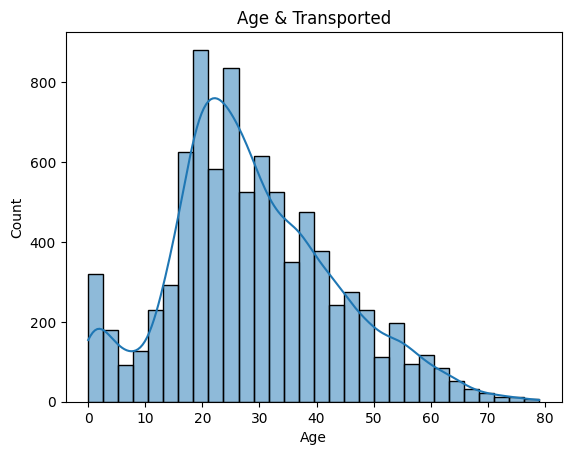

In [176]:
sns.histplot(train['Age'].dropna(),kde=True,bins=30)
plt.title('Age & Transported')
plt.show()

In [177]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [178]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [179]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)
train['RoomService'].fillna(0,inplace=True)
test['RoomService'].fillna(0,inplace=True)
train['FoodCourt'].fillna(0,inplace=True)
test['FoodCourt'].fillna(0,inplace=True)
train['ShoppingMall'].fillna(0,inplace=True)
test['ShoppingMall'].fillna(0,inplace=True)
train['Spa'].fillna(0,inplace=True)
test['Spa'].fillna(0,inplace=True)
train['VRDeck'].fillna(0,inplace=True)
test['VRDeck'].fillna(0,inplace=True)

In [180]:
label = LabelEncoder()
train['CryoSleep'] = label.fit_transform(train['CryoSleep'])
test['CryoSleep'] = label.fit_transform(test['CryoSleep'])
train['VIP'] = label.fit_transform(train['VIP'])
test['VIP'] = label.fit_transform(test['VIP'])


In [181]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [182]:
features = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [183]:
x_train = train[features]
y_train = train['Transported']

In [184]:
x_test = test[features]

随机森林

In [185]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [186]:
train_predictions = model.predict(x_train)
accuracy_score = accuracy_score(y_train,train_predictions)
print(f"Training accuracy:{accuracy_score:.2f}")

Training accuracy:0.92


In [187]:
test_preditions = model.predict(x_test)

In [188]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],'Transported':test_preditions})
submission.to_csv('submission.csv',index=False)

xgboost

In [191]:
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',   
    objective='binary:logistic'
)

In [194]:
xgb_clf.fit(x_train, y_train)

C:\Users\chen\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [195]:
y_pred = xgb_clf.predict(x_test)

In [199]:
y_pred_bool = y_pred.astype(bool)

In [200]:
y_pred_bool

array([ True, False,  True, ...,  True,  True,  True])

In [201]:
submission_xb = pd.DataFrame({'PassengerId': test['PassengerId'],'Transported':y_pred_bool})
submission.to_csv('submission_xb.csv',index=False)